# demo

> Demo of sample `ipyfernel` usage

In [ ]:
#| default_exp demo

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
from ipyfernel import * 

# Getting Started

On the remote machine, launch TCP proxy via `bore`:

```
bore local 22 --to bore.pub
```
...and note the port it assigns yous, e.g. "`listening at bore.pub:51916`. 

You also need to make sure that your SSH public key from the local machine (`ssh-keygen`) is included in the `~/.ssh/authorized_keys` file on the remote machine. 

Then you need to know the full path of the remote Python executable that you want to use, so you can reigster the remote kernel with the local runtime.

In [ ]:
register_remote_kernel(remote_python='/Users/shawley/exercises/solveit/.venv/bin/python')

ipyf_remote_kernel is already a registered kernel


In [ ]:
port, user = 22756, 'shawley' 
set_remote(port, user)

/app/data/.ssh/config file updated.


Success: remote kernel started


# Progress Bar

The remote execution has the same limitation that any other local solvit progress bars might have, e.g. nothing with `\r` -- so no `tqdm` :-(.   Here's a simple one where the bar is a string that keeps getting longer.

In [ ]:
%%remote 
#%%remote  <-- this is the magic used for this cell
import time
import socket 
hostname = socket.gethostname()   # let's clarify that we're running remotely
print("We're executing on",hostname) 

def test_progbar():
    print("[", end="", flush=True)
    for i in range(20):
        print("=", end="", flush=True)
        time.sleep(0.15)
    print("] Done!")

test_progbar()

We're executing on Chonk
[

=

=

=

=

=

=

=

=

=

=

=

=

=

=

=

=

=

=

=

=

] Done!


That worked! Chonk is the name of my remote laptop, and that progress bar went across the screen in real time over the span of a few seconds.
For other types of progress bars, see [TODO: Link to post by David or Rens...?]

# Matplotlib Plot

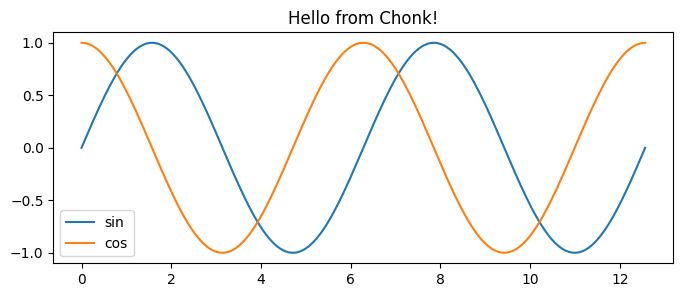

In [ ]:
%%remote 
#%%remote <-- cell magic for this execution (not displayed by docs)
import socket
import matplotlib.pyplot as plt
import numpy as np
hostname = socket.gethostname()   # let's make sure we're running remotely

def test_plot():
    x = np.linspace(0, 4*np.pi, 200)
    plt.figure(figsize=(8,3))
    plt.plot(x, np.sin(x), label='sin')
    plt.plot(x, np.cos(x), label='cos')
    plt.title(f"Hello from {hostname}!")
    plt.legend()
    plt.show()

test_plot()

The host name and the title confirms where it's being executed. 

# GPU Execution 

In [ ]:
%%remote 
#%%remote 
import torch 
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print("Device =",device) 

Device = mps


# 'Sticky' Remote Execution

Rather than using the `%%remote` magic for every cell, we can make it so that cells execute remotely by default.

In [ ]:
set_sticky()

Code cells will now execute remotely.


In [ ]:
print(hostname) 

Chonk


In [ ]:
%%local 
#%%local    <--- magic for this cell 
import socket 
hostname = socket.gethostname()   
print("We're executing on",hostname) 

We're executing on 909e93a3a71e


In [ ]:
unset_sticky()

Code cells will now run locally.


TODO: I never could get the magics to render in the docs, after many hours of trying. So all I could figure out to do was to just add them as comments.